In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv("../train.csv")

data.head()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,date_diff
0,10.5,834.0,56.0,0.0000,64.0,6.86252,79.8993,6.90330,79.8783,270.32,1,840.0
1,10.5,791.0,47.0,0.0000,134.0,6.88589,79.8984,6.91373,79.8923,197.85,1,780.0
2,10.5,1087.0,80.0,0.0000,61.0,6.90839,79.8651,6.93669,79.9146,301.64,1,1080.0
3,10.5,598.0,271.0,15.6638,68.0,6.92570,79.8895,6.92748,79.8971,82.30,1,600.0
5,10.5,3407.0,182.0,0.0000,112.0,7.13402,79.8969,6.91865,79.8649,1065.02,1,3420.0


In [3]:
test = pd.read_csv("../test.csv")

test.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare
0,213284604,10.5,924,42,2.4486,148,2/1/2020 0:38,2/1/2020 0:53,6.83454,79.8750,6.77490,79.8840,289.27
1,213286352,10.5,4249,20,0.0000,91,2/1/2020 1:02,2/1/2020 2:13,6.91168,79.8723,6.55091,79.9706,1912.70
2,213293973,10.5,1552,255,2.6588,23,2/1/2020 5:02,2/1/2020 5:28,6.92145,79.8478,6.90539,79.8989,394.00
3,213294622,10.5,462,16,0.0000,198,2/1/2020 5:30,2/1/2020 5:38,6.77433,79.9416,6.80401,79.9407,154.32
4,213298687,10.5,814,392,12.3692,69,2/1/2020 7:00,2/1/2020 7:14,6.97968,79.9130,6.98875,79.8914,147.47


# EDA

In [6]:
data.isna().describe()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
count,17176,17176,17176,17176,17176,17176,17176,17176,17176,17176,17176,17176,17176,17176
unique,1,2,2,2,2,2,1,1,1,1,1,1,2,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,17176,16974,16974,16974,16974,16974,17176,17176,17176,17176,17176,17176,17039,17176


In [6]:
data[data["label"]=="incorrect"].isna().describe()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
count,1681,1681,1681,1681,1681,1681,1681,1681,1681,1681,1681,1681,1681,1681
unique,1,2,2,2,2,2,1,1,1,1,1,1,2,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,1681,1532,1532,1532,1532,1532,1681,1681,1681,1681,1681,1681,1544,1681


In [8]:
data[data["label"]=="incorrect"].dropna().shape

(1526, 14)

In [9]:
data = data.dropna()

In [10]:
data.shape

(16968, 14)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16968 entries, 0 to 17175
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tripid                     16968 non-null  int64  
 1   additional_fare            16968 non-null  float64
 2   duration                   16968 non-null  float64
 3   meter_waiting              16968 non-null  float64
 4   meter_waiting_fare         16968 non-null  float64
 5   meter_waiting_till_pickup  16968 non-null  float64
 6   pickup_time                16968 non-null  object 
 7   drop_time                  16968 non-null  object 
 8   pick_lat                   16968 non-null  float64
 9   pick_lon                   16968 non-null  float64
 10  drop_lat                   16968 non-null  float64
 11  drop_lon                   16968 non-null  float64
 12  fare                       16968 non-null  float64
 13  label                      16968 non-null  obj

In [12]:
data["pickup_time"] = pd.to_datetime(data["pickup_time"])
data["drop_time"] = pd.to_datetime(data["drop_time"])
data["label"] = data["label"].apply(lambda x: 1 if x=="correct" else 0)

In [16]:
import numpy as np
data["date_diff"] = data['drop_time'] - data['pickup_time']
data['date_diff']=data['date_diff']/np.timedelta64(1,'s')

In [22]:
data.drop(["tripid" , "pickup_time" , "drop_time"], axis=1, inplace=True)

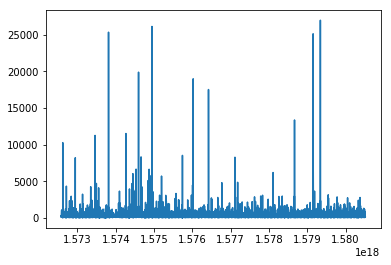

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(data["pickup_time"],data["fare"])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(["label"],axis=1),data["label"], test_size=0.33, random_state=42)

import xgboost

clf = xgboost.XGBClassifier(n_estimators = 1000)

clf.fit(X_train,y_train)

pred = clf.predict(X_test)

from sklearn.metrics import f1_score,confusion_matrix

print (confusion_matrix(y_test,pred))

print (f1_score(y_test,pred,average="macro"))



[[ 247  254]
 [  83 5016]]
0.7809818886459095


/home/sulhi/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [29]:
clf

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=1000)

rf_clf.fit(X_train,y_train)

pred = rf_clf.predict(X_test)

print (confusion_matrix(y_test,pred))

print (f1_score(y_test,pred,average="macro"))


[[ 223  278]
 [  44 5055]]
0.7749313011247443


In [34]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()

lr_clf.fit(X_train,y_train)

pred = lr_clf.predict(X_test)

print (confusion_matrix(y_test,pred))

print (f1_score(y_test,pred,average="macro"))


[[  66  435]
 [  25 5074]]
0.5898047368635604
